In [4]:
import pandas as pd
import os
# Adjust the path to your username
file_path = os.path.expanduser('~/Downloads/AI_Human.csv')


In [5]:
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()


,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [6]:
df.shape

(487235, 2)

In [4]:
df = df.dropna()

# Features and labels
X = df['text']
y = df['generated']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9923856044824366

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     61112
         1.0       0.99      0.98      0.99     36335

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1️⃣ Features & Target
X = df['text']
y = df['generated']   # 0 = human, 1 = AI

# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4️⃣ Define a variety of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Ridge Classifier": RidgeClassifier(),
    "Stochastic Gradient Descent (SGD)": SGDClassifier(loss="log_loss", max_iter=1000),
    "Support Vector Machine (LinearSVC)": LinearSVC(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "Naive Bayes (Complement)": ComplementNB(),
   
}

# 5️⃣ Train & Evaluate each model
results = {}

for name, model in models.items():
    print("="*80)
    print(f"Training {name}...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

print("="*80)
print("\n📊 Summary of Accuracies:")
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name:35}: {acc:.4f}")


In [7]:
dff = pd.read_csv("train_v2_drcat_02.csv")

dff.head()


,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [8]:
dff = dff[["text", "label"]]
dff

,text,label
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0
...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1
44864,"Dear Senator,\n\nI am writing to you today to ...",1
44865,"Dear Senator,\n\nI am writing to you today to ...",1
44866,"Dear Senator,\n\nI am writing to you today to ...",1


In [9]:
dff = dff.rename(columns={'label': 'generated'})

In [10]:
dff.shape

(44868, 2)

In [11]:
from datasets import disable_progress_bar
disable_progress_bar()

from datasets import load_dataset
ds = load_dataset("artem9k/ai-text-detection-pile")
print(ds)

DatasetDict({
    train: Dataset({
        features: ['source', 'id', 'text'],
        num_rows: 1392522
    })
})


In [12]:
ds= ds['train'].to_pandas()
ds= ds.rename(columns={'source': 'generated'})
ds

,generated,id,text
0,human,0,12 Years a Slave: An Analysis of the Film Essa...
1,human,1,20+ Social Media Post Ideas to Radically Simpl...
2,human,2,2022 Russian Invasion of Ukraine in Global Med...
3,human,3,533 U.S. 27 (2001) Kyllo v. United States: The...
4,human,4,A Charles Schwab Corporation Case Essay\n\nCha...
...,...,...,...
1392517,ai,1418649,"Today, I accomplished a major feat. I stepped ..."
1392518,ai,1418650,As rockets rain down from the sky\nEurope trem...
1392519,ai,1418651,"On January 6th, 2023, the world lost a true pi..."
1392520,ai,1418652,A gene bank is a repository of genetic materia...


In [13]:
ds = ds.drop(columns=['id'])

# Replace 'human' with 0 and 'ai' with 1 in the 'generated' column
ds['generated'] = ds['generated'].replace({'human': 0, 'ai': 1})
ds

C:\Users\ACER\AppData\Local\Temp\ipykernel_17668\2016149183.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['generated'] = ds['generated'].replace({'human': 0, 'ai': 1})


,generated,text
0,0,12 Years a Slave: An Analysis of the Film Essa...
1,0,20+ Social Media Post Ideas to Radically Simpl...
2,0,2022 Russian Invasion of Ukraine in Global Med...
3,0,533 U.S. 27 (2001) Kyllo v. United States: The...
4,0,A Charles Schwab Corporation Case Essay\n\nCha...
...,...,...
1392517,1,"Today, I accomplished a major feat. I stepped ..."
1392518,1,As rockets rain down from the sky\nEurope trem...
1392519,1,"On January 6th, 2023, the world lost a true pi..."
1392520,1,A gene bank is a repository of genetic materia...


In [14]:
import pandas as pd

# Assuming df, dff, and ds are your DataFrames

# Method 1: Concatenate vertically (default)
# This will stack df, then dff, then ds, one below the other.
combined_df = pd.concat([df, dff, ds])

# Method 2: Concatenate and ignore the original index (often useful to avoid duplicate indices)
# This will create a new, continuous index for the combined DataFrame.
# combined_df = pd.concat([df, dff, ds], ignore_index=True)

print(combined_df)

                                                      text  generated
0        Cars. Cars have been around since they became ...        0.0
1        Transportation is a large necessity in most co...        0.0
2        "America's love affair with it's vehicles seem...        0.0
3        How often do you ride in a car? Do you drive a...        0.0
4        Cars are a wonderful thing. They are perhaps o...        0.0
...                                                    ...        ...
1392517  Today, I accomplished a major feat. I stepped ...        1.0
1392518  As rockets rain down from the sky\nEurope trem...        1.0
1392519  On January 6th, 2023, the world lost a true pi...        1.0
1392520  A gene bank is a repository of genetic materia...        1.0
1392521  On the twelfth day of Christmas, My true love ...        1.0

[1924625 rows x 2 columns]


In [15]:
combined_df.shape

(1924625, 2)

In [14]:
combined_df.generated.value_counts()

generated
0.0    1361314
1.0     563311
Name: count, dtype: int64

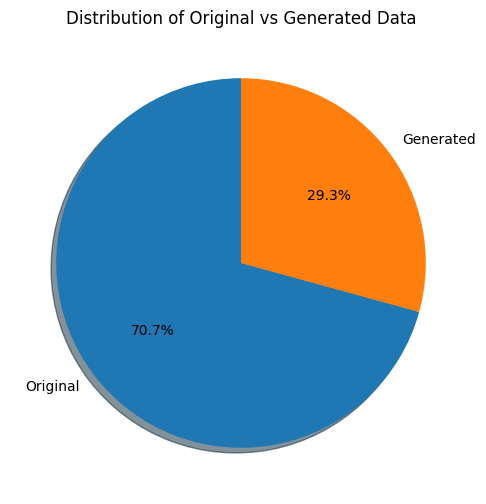

In [15]:
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame
counts = combined_df['generated'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts, 
    labels=counts.index.map({0.0: 'Original', 1.0: 'Generated'}), 
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=True
)

plt.title('Distribution of Original vs Generated Data')
plt.show()


In [17]:
combined_df

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
1392517,"Today, I accomplished a major feat. I stepped ...",1.0
1392518,As rockets rain down from the sky\nEurope trem...,1.0
1392519,"On January 6th, 2023, the world lost a true pi...",1.0
1392520,A gene bank is a repository of genetic materia...,1.0


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report

# 1️⃣ Features & Target
X = combined_df['text']
y = combined_df['generated']   # 0 = human, 1 = AI

# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3️⃣ Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(1, 2)
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4️⃣ Define a variety of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Ridge Classifier": RidgeClassifier(),
    "Stochastic Gradient Descent (SGD)": SGDClassifier(loss="log_loss", max_iter=1000),
    "Support Vector Machine (LinearSVC)": LinearSVC(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "Naive Bayes (Complement)": ComplementNB(),
}

# 5️⃣ Train & Evaluate each model
results = {}

for name, model in models.items():
    print("="*80)
    print(f"Training {name}...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

print("="*80)
print("\n📊 Summary of Accuracies:")
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name:35}: {acc:.4f}")


Training Logistic Regression...

Logistic Regression Accuracy: 0.9106
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94    272246
         1.0       0.86      0.83      0.85    112679

    accuracy                           0.91    384925
   macro avg       0.89      0.89      0.89    384925
weighted avg       0.91      0.91      0.91    384925

Training Ridge Classifier...

Ridge Classifier Accuracy: 0.9065
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93    272246
         1.0       0.87      0.81      0.83    112679

    accuracy                           0.91    384925
   macro avg       0.89      0.88      0.88    384925
weighted avg       0.91      0.91      0.91    384925

Training Stochastic Gradient Descent (SGD)...

Stochastic Gradient Descent (SGD) Accuracy: 0.8610
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91    272246
     

In [15]:
import joblib

joblib.dump(models["Support Vector Machine (LinearSVC)"], "svm_model_combined.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Saved best model: svm_model_combined.pkl")


✅ Saved best model: svm_model_combined.pkl


# Balanced dataset

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from tqdm import tqdm  # 🔹 Progress bar

# 1️⃣ Features & Target
X = combined_df['text']
y = combined_df['generated']   # 0 = human, 1 = AI

# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(1, 2)
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4️⃣ Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_vec, y_train)

print("✅ Data balanced using SMOTE:")
print(y_train_bal.value_counts())

# 5️⃣ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced'),
    "Ridge Classifier": RidgeClassifier(class_weight='balanced'),
    "Stochastic Gradient Descent (SGD)": SGDClassifier(loss="log_loss", max_iter=1000, class_weight='balanced'),
    "Support Vector Machine (LinearSVC)": LinearSVC(class_weight='balanced'),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "Naive Bayes (Complement)": ComplementNB(),
}

# 6️⃣ Train & Evaluate each model with progress bar
results = {}

print("\n🚀 Training models...\n")
for name, model in tqdm(models.items(), desc="Model Progress", unit="model"):
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

print("="*80)
print("\n📊 Summary of Accuracies:")
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name:35}: {acc:.4f}")


✅ Data balanced using SMOTE:
generated
1.0    1089051
0.0    1089051
Name: count, dtype: int64

🚀 Training models...



Model Progress:  17%|██████████▊                                                      | 1/6 [00:38<03:11, 38.23s/model]


Logistic Regression Accuracy: 0.9012
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93    272263
         1.0       0.79      0.90      0.84    112662

    accuracy                           0.90    384925
   macro avg       0.87      0.90      0.89    384925
weighted avg       0.91      0.90      0.90    384925



Model Progress:  33%|█████████████████████▋                                           | 2/6 [02:37<05:43, 85.91s/model]


Ridge Classifier Accuracy: 0.8933
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92    272263
         1.0       0.77      0.91      0.83    112662

    accuracy                           0.89    384925
   macro avg       0.86      0.90      0.88    384925
weighted avg       0.90      0.89      0.90    384925



Model Progress:  50%|████████████████████████████████▌                                | 3/6 [02:46<02:32, 50.94s/model]


Stochastic Gradient Descent (SGD) Accuracy: 0.8482
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89    272263
         1.0       0.69      0.87      0.77    112662

    accuracy                           0.85    384925
   macro avg       0.82      0.86      0.83    384925
weighted avg       0.87      0.85      0.85    384925



Model Progress:  67%|███████████████████████████████████████████▎                     | 4/6 [05:30<03:10, 95.26s/model]


Support Vector Machine (LinearSVC) Accuracy: 0.9072
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93    272263
         1.0       0.80      0.91      0.85    112662

    accuracy                           0.91    384925
   macro avg       0.88      0.91      0.89    384925
weighted avg       0.91      0.91      0.91    384925



Model Progress:  83%|██████████████████████████████████████████████████████▏          | 5/6 [05:31<01:01, 61.54s/model]


Naive Bayes (Multinomial) Accuracy: 0.7887
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84    272263
         1.0       0.61      0.80      0.69    112662

    accuracy                           0.79    384925
   macro avg       0.75      0.79      0.76    384925
weighted avg       0.82      0.79      0.80    384925



Model Progress: 100%|█████████████████████████████████████████████████████████████████| 6/6 [05:33<00:00, 55.60s/model]


Naive Bayes (Complement) Accuracy: 0.7887
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84    272263
         1.0       0.61      0.80      0.69    112662

    accuracy                           0.79    384925
   macro avg       0.75      0.79      0.76    384925
weighted avg       0.82      0.79      0.80    384925


📊 Summary of Accuracies:
Support Vector Machine (LinearSVC) : 0.9072
Logistic Regression                : 0.9012
Ridge Classifier                   : 0.8933
Stochastic Gradient Descent (SGD)  : 0.8482
Naive Bayes (Multinomial)          : 0.7887
Naive Bayes (Complement)           : 0.7887


In [19]:
import joblib  # For saving models efficiently

# ✅ Get the best model (LinearSVC)
best_model = models["Support Vector Machine (LinearSVC)"]

# ✅ Save the model and vectorizer
joblib.dump(best_model, "best_model_LinearSVC.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("🎯 Model and vectorizer saved successfully!")
print("➡️ Files created: best_model_LinearSVC.pkl and tfidf_vectorizer.pkl")


🎯 Model and vectorizer saved successfully!
➡️ Files created: best_model_LinearSVC.pkl and tfidf_vectorizer.pkl


# DEEP LEARNING

In [23]:
# ======================================================
# 🧠 Deep Learning Text Classification using MLPClassifier
# ======================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

# 1️⃣ Features & Target
X = combined_df['text']
y = combined_df['generated']   # 0 = human, 1 = AI

# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ TF-IDF Vectorization
print("\n🔤 Creating TF-IDF features...")
vectorizer = TfidfVectorizer(
    max_features=5000,     # reduce to prevent memory issues
    stop_words='english',
    ngram_range=(1, 2)
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4️⃣ Balance the training data with SMOTE
print("\n⚖️  Balancing data with SMOTE...")
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_vec, y_train)

print("✅ After SMOTE balancing:")
print(y_train_bal.value_counts())

# 5️⃣ Define and Train Deep Learning Model (MLP)
print("\n🚀 Training Deep Learning Model (MLPClassifier)...\n")

mlp = MLPClassifier(
    hidden_layer_sizes=(512, 256),  # Deep architecture
    activation='relu',
    solver='adam',
    batch_size=512,
    max_iter=10,                    # Increase for more epochs
    random_state=42,
    verbose=True
)

mlp.fit(X_train_bal, y_train_bal)

# 6️⃣ Test the Model
print("\n📊 Evaluating Model...")
y_pred = mlp.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)

print(f"\n✅ Deep Learning (MLPClassifier) Accuracy: {acc:.4f}")
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))

# 7️⃣ Save the Model and Vectorizer
import joblib
joblib.dump(mlp, "deep_mlp_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("\n💾 Model and vectorizer saved as deep_mlp_model.pkl and tfidf_vectorizer.pkl")



🔤 Creating TF-IDF features...

⚖️  Balancing data with SMOTE...
✅ After SMOTE balancing:
generated
1.0    1089051
0.0    1089051
Name: count, dtype: int64

🚀 Training Deep Learning Model (MLPClassifier)...

Iteration 1, loss = 0.13487589
Iteration 2, loss = 0.06399328
Iteration 3, loss = 0.03171210
Iteration 4, loss = 0.02057228
Iteration 5, loss = 0.01696640
Iteration 6, loss = 0.01490737
Iteration 7, loss = 0.01387552
Iteration 8, loss = 0.01303160
Iteration 9, loss = 0.01281101
Iteration 10, loss = 0.01233700

📊 Evaluating Model...


C:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



✅ Deep Learning (MLPClassifier) Accuracy: 0.9395

Detailed Classification Report:

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    272263
         1.0       0.90      0.89      0.90    112662

    accuracy                           0.94    384925
   macro avg       0.93      0.93      0.93    384925
weighted avg       0.94      0.94      0.94    384925


💾 Model and vectorizer saved as deep_mlp_model.pkl and tfidf_vectorizer.pkl


In [1]:
import joblib
import numpy as np

# 🔹 Load the saved model and vectorizer
mlp = joblib.load("deep_mlp_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

def predict_text_origin(text: str):
    """
    Predict whether a given text is AI-generated or human-written.
    Returns both the predicted label and confidence percentages.
    """
    # 1️⃣ Transform text
    text_vec = vectorizer.transform([text])

    # 2️⃣ Predict class and probability
    pred = mlp.predict(text_vec)[0]
    probs = mlp.predict_proba(text_vec)[0]

    # 3️⃣ Interpret result
    label = "AI-generated" if pred == 1 else "Human-written"
    ai_prob = probs[1] * 100
    human_prob = probs[0] * 100

    print("🔍 Prediction Results:")
    print(f"🧠 Text is likely: **{label}**")
    print(f"🤖 AI Probability: {ai_prob:.2f}%")
    print(f"👤 Human Probability: {human_prob:.2f}%")

    return {
        "label": label,
        "ai_probability": ai_prob,
        "human_probability": human_prob
    }

# 🧪 Example test
sample_text = "Artificial intelligence is transforming industries worldwide."
result = predict_text_origin(sample_text)


🔍 Prediction Results:
🧠 Text is likely: **AI-generated**
🤖 AI Probability: 98.32%
👤 Human Probability: 1.68%


In [2]:
import joblib
import numpy as np

# 🔹 Load the saved model and vectorizer
mlp = joblib.load("deep_mlp_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

def predict_text_origin(text: str):
    """
    Predict whether a given text is AI-generated or human-written.
    Returns both the predicted label and confidence percentages.
    """
    # 1️⃣ Transform text
    text_vec = vectorizer.transform([text])

    # 2️⃣ Predict class and probability
    pred = mlp.predict(text_vec)[0]
    probs = mlp.predict_proba(text_vec)[0]

    # 3️⃣ Interpret result
    label = "AI-generated" if pred == 1 else "Human-written"
    ai_prob = probs[1] * 100
    human_prob = probs[0] * 100

    print("\n🔍 Prediction Results:")
    print(f"🧠 Text is likely: {label}")
    print(f"🤖 AI Probability: {ai_prob:.2f}%")
    print(f"👤 Human Probability: {human_prob:.2f}%")

    return {
        "label": label,
        "ai_probability": ai_prob,
        "human_probability": human_prob
    }


# 🧪 Use your sample text
sample_text = """
Artificial intelligence (AI) is rapidly reshaping the landscape of technology, business, and society. 
From natural language processing and computer vision to robotics and autonomous systems, AI is being deployed 
to solve complex problems that were previously thought to be exclusive to human intelligence. Companies across 
industries are leveraging AI to enhance decision-making, optimize operations, and create innovative products 
and services. For instance, in healthcare, AI algorithms assist in diagnosing diseases, predicting patient 
outcomes, and personalizing treatment plans. In finance, AI-driven models detect fraudulent transactions, 
analyze market trends, and automate trading strategies. Despite the numerous benefits, the proliferation of AI 
also raises ethical, social, and economic concerns. Issues such as data privacy, algorithmic bias, job displacement, 
and accountability must be carefully addressed to ensure responsible AI deployment. As research advances, 
it is increasingly important for policymakers, organizations, and individuals to understand both the potential 
and limitations of AI technologies. Moreover, fostering collaboration between humans and AI systems will likely 
be a key driver of sustainable growth and innovation in the coming decades. With continuous improvement in 
machine learning techniques and the expansion of AI applications, society stands on the brink of a transformative era, 
where AI not only augments human capabilities but also challenges our understanding of intelligence, creativity, 
and decision-making processes.
"""

# 🧾 Run prediction
result = predict_text_origin(sample_text)



🔍 Prediction Results:
🧠 Text is likely: AI-generated
🤖 AI Probability: 100.00%
👤 Human Probability: 0.00%


In [22]:
# ======================================================
# 🧠 Improved Deep Learning Text Classification (MLPClassifier with Progress Bar)
# ======================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from tqdm import tqdm
import time
import joblib

# 1️⃣ Features & Target
X = combined_df['text']
y = combined_df['generated']   # 0 = human, 1 = AI

# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ TF-IDF Vectorization (Enhanced)
print("\n🔤 Creating TF-IDF features...")
vectorizer = TfidfVectorizer(
    max_features=15000,
    stop_words='english',
    ngram_range=(1, 3),
    sublinear_tf=True,
    min_df=3
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4️⃣ Balance the training data with SMOTE-Tomek
print("\n⚖️  Balancing data with SMOTE-Tomek...")
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train_vec, y_train)

print("✅ After balancing:")
print(y_train_bal.value_counts())

# 5️⃣ Optional: Feature Selection
print("\n🎯 Selecting most informative features...")
selector = SelectKBest(chi2, k=8000)
X_train_bal = selector.fit_transform(X_train_bal, y_train_bal)
X_test_vec = selector.transform(X_test_vec)

# 6️⃣ Define Improved MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(1024, 512, 256),
    activation='relu',
    solver='adam',
    learning_rate_init=0.0005,
    batch_size=256,
    max_iter=1,           # We'll train manually for multiple "epochs"
    warm_start=True,      # So it continues training each loop
    random_state=42
)

# 7️⃣ Manual Epoch Training with Progress Bar
n_epochs = 30
print(f"\n🚀 Training for {n_epochs} epochs with progress bar...\n")

epoch_bar = tqdm(range(n_epochs), desc="Training Progress", unit="epoch")
for epoch in epoch_bar:
    start_time = time.time()

    mlp.fit(X_train_bal, y_train_bal)  # trains one more iteration (epoch)
    y_pred_train = mlp.predict(X_train_bal)
    train_acc = accuracy_score(y_train_bal, y_pred_train)

    elapsed = time.time() - start_time
    epoch_bar.set_postfix({
        "Train Acc": f"{train_acc:.4f}",
        "Time": f"{elapsed:.2f}s"
    })

print("\n✅ Training completed successfully!")

# 8️⃣ Test the Model
print("\n📊 Evaluating Model...")
y_pred = mlp.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)

print(f"\n✅ Final Deep Learning (MLPClassifier) Accuracy: {acc:.4f}")
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))



MemoryError: Unable to allocate 162. GiB for an array with shape (2178102, 10000) and data type float64

In [ ]:
# 9️⃣ Save Everything
joblib.dump(mlp, "improved_mlp_model.pkl")
joblib.dump(vectorizer, "improved_tfidf_vectorizer.pkl")
joblib.dump(selector, "feature_selector.pkl")
print("\n💾 Model, vectorizer, and selector saved successfully!")

# 🔟 Example Prediction
sample_text = ["Artificial intelligence is transforming the world of technology."]
X_sample = vectorizer.transform(sample_text)
X_sample = selector.transform(X_sample)
prediction = mlp.predict(X_sample)
print("\n🔍 Sample Prediction:", "AI-generated 🤖" if prediction[0] == 1 else "Human-written 🧑‍💻")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import time

# 1️⃣ Dataset
X = combined_df['text']
y = combined_df['generated']  # 0 = human, 1 = AI

# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3️⃣ TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(1, 2)
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4️⃣ Advanced Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
}

# 5️⃣ Train & Evaluate with tqdm progress bar
results = {}
reports = {}

print("\n🚀 Training Models...\n")

for name, model in tqdm(models.items(), desc="Training Progress", ncols=100, leave=True):
    start_time = time.time()
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    elapsed = time.time() - start_time

    results[name] = (acc, elapsed)
    reports[name] = classification_report(y_test, y_pred, digits=4)

# 6️⃣ Print all results AFTER progress bar finishes
print("\n" + "="*100)
print("\n📊 Summary of Accuracies & Training Time:\n")
for name, (acc, elapsed) in sorted(results.items(), key=lambda x: x[1][0], reverse=True):
    print(f"{name:35}: {acc:.4f}  |  Time: {elapsed:.2f}s")

print("\n" + "="*100)
print("\n🧾 Detailed Classification Reports:\n")
for name, report in reports.items():
    print(f"\n{'='*80}")
    print(f"📘 {name}")
    print(report)


In [8]:
import joblib

def check_text_origin(text):
    """
    Checks whether a given text is AI-generated or Human-written.
    Returns a readable label.
    """

    # Load your saved model and vectorizer
    model = joblib.load("svm_model.pkl")
    vectorizer = joblib.load("tfidf_vectorizer.pkl")

    # Preprocess and transform the input text
    X = vectorizer.transform([text])

    # Predict using the model
    prediction = model.predict(X)[0]

    # Interpret prediction
    if prediction == 1:
        return "🤖 This text is AI-generated."
    else:
        return "🧑 This text is Human-written."

sample_text = """
Artificial intelligence (AI) is rapidly reshaping the landscape of technology, business, and society. 
From natural language processing and computer vision to robotics and autonomous systems, AI is being deployed 
to solve complex problems that were previously thought to be exclusive to human intelligence. Companies across 
industries are leveraging AI to enhance decision-making, optimize operations, and create innovative products 
and services. For instance, in healthcare, AI algorithms assist in diagnosing diseases, predicting patient 
outcomes, and personalizing treatment plans. In finance, AI-driven models detect fraudulent transactions, 
analyze market trends, and automate trading strategies. Despite the numerous benefits, the proliferation of AI 
also raises ethical, social, and economic concerns. Issues such as data privacy, algorithmic bias, job displacement, 
and accountability must be carefully addressed to ensure responsible AI deployment. As research advances, 
it is increasingly important for policymakers, organizations, and individuals to understand both the potential 
and limitations of AI technologies. Moreover, fostering collaboration between humans and AI systems will likely 
be a key driver of sustainable growth and innovation in the coming decades. With continuous improvement in 
machine learning techniques and the expansion of AI applications, society stands on the brink of a transformative era, 
where AI not only augments human capabilities but also challenges our understanding of intelligence, creativity, 
and decision-making processes.
"""

check_text_origin(sample_text)

'🤖 This text is AI-generated.'

In [9]:
import joblib

def check_text_origin(text):
    """
    Checks whether a given text is AI-generated or Human-written.
    Returns both label and AI probability percentage.
    """

    # Load model and vectorizer
    model = joblib.load("svm_model.pkl")
    vectorizer = joblib.load("tfidf_vectorizer.pkl")

    # Transform text
    X = vectorizer.transform([text])

    # Try to get probability if available
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X)[0][1]  # probability of AI class (1)
    elif hasattr(model, "decision_function"):
        # Convert decision score to pseudo-probability using sigmoid
        import numpy as np
        score = model.decision_function(X)[0]
        proba = 1 / (1 + np.exp(-score))
    else:
        # fallback if no probability available
        proba = float(model.predict(X)[0])

    ai_percent = round(proba * 100, 2)
    human_percent = round((1 - proba) * 100, 2)

    label = "🤖 AI-generated" if ai_percent >= 50 else "🧑 Human-written"

    return f"{label} — {ai_percent}% AI probability, {human_percent}% Human probability."

# Example usage:
sample_text = """Artificial intelligence (AI) is rapidly reshaping the landscape of technology..."""

print(check_text_origin(sample_text))


🤖 AI-generated — 98.51% AI probability, 1.49% Human probability.


In [18]:
# ============================================================
# ⚡ Fixed Incremental Training (No Errors)
# ============================================================

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle, compute_class_weight
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import joblib

# 1️⃣ Shuffle and prepare data
combined_df = shuffle(combined_df, random_state=42)
n_chunks = 200  # Adjust based on your RAM (higher = smaller chunks)
chunk_size = int(np.ceil(len(combined_df) / n_chunks))

# 2️⃣ Hashing Vectorizer (fast & memory efficient)
vectorizer = HashingVectorizer(
    n_features=2**16,
    alternate_sign=False,
    ngram_range=(1, 2)
)

# 3️⃣ Compute class weights manually
classes = np.array([0, 1])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=combined_df['generated'])
cw_dict = {cls: w for cls, w in zip(classes, class_weights)}
print(f"⚖️ Computed Class Weights: {cw_dict}")

# 4️⃣ Define model
clf = SGDClassifier(
    loss='log_loss',
    max_iter=1,
    tol=None,
    class_weight=cw_dict,  # ✅ Use fixed computed weights
    random_state=42
)

# 5️⃣ Incremental training loop
print("\n🚀 Starting incremental training...")
for i in tqdm(range(n_chunks)):
    start = i * chunk_size
    end = min(len(combined_df), (i + 1) * chunk_size)
    chunk = combined_df.iloc[start:end]

    X_chunk = vectorizer.transform(chunk['text'])
    y_chunk = chunk['generated'].values

    if i == 0:
        clf.partial_fit(X_chunk, y_chunk, classes=classes)
    else:
        clf.partial_fit(X_chunk, y_chunk)

    if (i + 1) % 20 == 0:
        print(f"✅ Processed chunk {i + 1}/{n_chunks}")

print("\n🎉 Incremental training complete!")

# 6️⃣ Save model
joblib.dump(clf, "sgd_hash_model.pkl")
joblib.dump(vectorizer, "hash_vectorizer.pkl")
print("💾 Model saved as sgd_hash_model.pkl and hash_vectorizer.pkl")


⚖️ Computed Class Weights: {np.int64(0): np.float64(0.7068997307013665), np.int64(1): np.float64(1.7083147675085344)}

🚀 Starting incremental training...


 10%|████████                                                                         | 20/200 [01:19<11:53,  3.96s/it]

✅ Processed chunk 20/200


 20%|████████████████▏                                                                | 40/200 [02:38<10:44,  4.03s/it]

✅ Processed chunk 40/200


 30%|████████████████████████▎                                                        | 60/200 [03:56<09:02,  3.88s/it]

✅ Processed chunk 60/200


 40%|████████████████████████████████▍                                                | 80/200 [06:26<16:29,  8.24s/it]

✅ Processed chunk 80/200


 50%|████████████████████████████████████████                                        | 100/200 [08:07<06:33,  3.93s/it]

✅ Processed chunk 100/200


 60%|████████████████████████████████████████████████                                | 120/200 [09:29<05:56,  4.45s/it]

✅ Processed chunk 120/200


 70%|████████████████████████████████████████████████████████                        | 140/200 [10:48<03:55,  3.92s/it]

✅ Processed chunk 140/200


 80%|████████████████████████████████████████████████████████████████                | 160/200 [13:28<07:05, 10.64s/it]

✅ Processed chunk 160/200


 90%|████████████████████████████████████████████████████████████████████████        | 180/200 [17:01<03:34, 10.72s/it]

✅ Processed chunk 180/200


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [20:46<00:00,  6.23s/it]

✅ Processed chunk 200/200

🎉 Incremental training complete!
💾 Model saved as sgd_hash_model.pkl and hash_vectorizer.pkl


In [20]:
# ============================================================
# 📊 Evaluate Model Performance (Same Style as MLP Output)
# ============================================================
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("\n📊 Evaluating Model...")

# Take a test subset for evaluation
test_sample = combined_df.sample(5000, random_state=42)
X_test = vectorizer.transform(test_sample['text'])
y_test = test_sample['generated']

# Make predictions
y_pred = clf.predict(X_test)

# Compute accuracy
acc = accuracy_score(y_test, y_pred)

# Print formatted output
print(f"\n✅ Incremental Learning (SGDClassifier) Accuracy: {acc:.4f}\n")
print("Detailed Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Human (0)', 'AI (1)']))



📊 Evaluating Model...

✅ Incremental Learning (SGDClassifier) Accuracy: 0.8406

Detailed Classification Report:

              precision    recall  f1-score   support

   Human (0)       0.95      0.82      0.88      3539
      AI (1)       0.67      0.89      0.76      1461

    accuracy                           0.84      5000
   macro avg       0.81      0.85      0.82      5000
weighted avg       0.87      0.84      0.85      5000



In [ ]:

# 7️⃣ Example: Prediction function
def predict_text_origin(text: str):
    text_vec = vectorizer.transform([text])
    pred = clf.predict(text_vec)[0]
    probs = clf.predict_proba(text_vec)[0]
    label = "AI-generated" if pred == 1 else "Human-written"

    print("\n🔍 Prediction Results:")
    print(f"🧠 Text is likely: {label}")
    print(f"🤖 AI Probability: {probs[1]*100:.2f}%")
    print(f"👤 Human Probability: {probs[0]*100:.2f}%")

    return {
        "label": label,
        "ai_probability": probs[1]*100,
        "human_probability": probs[0]*100
    }

# 🧪 Test it
sample_text = """
Artificial intelligence (AI) is rapidly reshaping the landscape of technology, business, and society. 
From natural language processing and computer vision to robotics and autonomous systems, AI is being deployed 
to solve complex problems that were previously thought to be exclusive to human intelligence. Companies across 
industries are leveraging AI to enhance decision-making, optimize operations, and create innovative products 
and services. For instance, in healthcare, AI algorithms assist in diagnosing diseases, predicting patient 
outcomes, and personalizing treatment plans. In finance, AI-driven models detect fraudulent transactions, 
analyze market trends, and automate trading strategies. Despite the numerous benefits, the proliferation of AI 
also raises ethical, social, and economic concerns. Issues such as data privacy, algorithmic bias, job displacement, 
and accountability must be carefully addressed to ensure responsible AI deployment. As research advances, 
it is increasingly important for policymakers, organizations, and individuals to understand both the potential 
and limitations of AI technologies. Moreover, fostering collaboration between humans and AI systems will likely 
be a key driver of sustainable growth and innovation in the coming decades. With continuous improvement in 
machine learning techniques and the expansion of AI applications, society stands on the brink of a transformative era, 
where AI not only augments human capabilities but also challenges our understanding of intelligence, creativity, 
and decision-making processes.
"""

result = predict_text_origin(sample_text)


In [ ]:
# ======================================================
# 🚀 Improved Deep Learning Text Classifier (MLPClassifier)
# ======================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import joblib

# 1️⃣ Features & Target
X = combined_df['text']
y = combined_df['generated']   # 0 = human, 1 = AI

# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ TF-IDF Vectorization
print("\n🔤 Creating TF-IDF features...")
vectorizer = TfidfVectorizer(
    max_features=8000,       # more features = better accuracy
    stop_words='english',
    ngram_range=(1, 3)       # include trigrams
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4️⃣ Balance data with SMOTE
print("\n⚖️  Balancing data with SMOTE...")
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_vec, y_train)

print("✅ After SMOTE balancing:")
print(y_train_bal.value_counts())

# 5️⃣ Define & Train MLP Model
print("\n🚀 Training Improved MLPClassifier...\n")

mlp = MLPClassifier(
    hidden_layer_sizes=(1024, 512, 256),  # deeper + more neurons
    activation='relu',
    solver='adam',
    batch_size=512,
    learning_rate_init=0.0005,             # smaller learning rate = more stable
    early_stopping=True,                   # auto-stop when not improving
    max_iter=30,                           # more epochs for learning
    random_state=42,
    verbose=True
)

mlp.fit(X_train_bal, y_train_bal)

# 6️⃣ Evaluate Model
print("\n📊 Evaluating Model...")
y_pred = mlp.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)

print(f"\n✅ Improved MLPClassifier Accuracy: {acc:.4f}")
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Human', 'AI']))

# 7️⃣ Save the Model
joblib.dump(mlp, "improved_mlp_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("\n💾 Model and vectorizer saved as improved_mlp_model.pkl and tfidf_vectorizer.pkl")
